In [1]:
import pandas as pd
import numpy as np
import numba
import time
import yfinance as yf
import matplotlib.pyplot as plt
from quantitative_finance.portfolio.portfolio import Portfolio

In [2]:
# Define the ticker symbols
tickers = ["SPY", "EFA", "EEM", "AGG"]

# Download historical data from Yahoo Finance
data = yf.download(tickers, start="2000-01-01", end="2022-12-31")

[*********************100%%**********************]  4 of 4 completed


In [3]:
# Calculate monthly returns
returns = data['Adj Close'].pct_change().dropna()

# Generate random weights for each month that sum to 1
np.random.seed(0)  # for reproducibility
number_of_trades = 20
random_weights = np.random.rand(number_of_trades, len(tickers))
random_weights /= random_weights.sum(axis=1)[:, np.newaxis]

weight_dates = np.sort(np.random.choice(returns.index, size=number_of_trades - 1, replace=False))
weight_dates = np.insert(weight_dates, 0, returns.index[0])

# Create a DataFrame for trades with dates as index and tickers as columns
trades = pd.DataFrame(random_weights, columns=tickers, index=weight_dates)

trade_dates = trades.index.to_numpy()
positions = trades.columns.to_numpy()
weights_target_arr = trades.to_numpy()
return_dates = returns[positions].index.to_numpy()
position_returns_arr = returns[positions].to_numpy()

In [7]:
port = Portfolio(
    position_returns=returns[positions],
    positions=positions,
    weights_target=trades
)

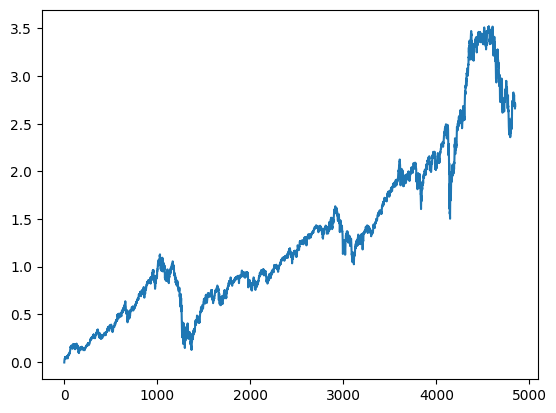

In [10]:
plt.plot(port.backtest.cumulative_performance_arr)